In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

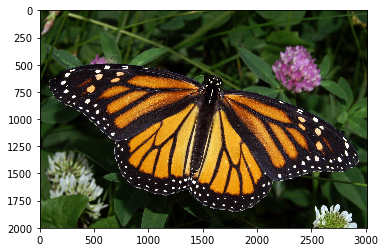

In [2]:
#Read in the image
image = cv2.imread('D:/images/d10.jpg')

#make a copy of the image
image_copy = np.copy(image)

#change color to RGB from BGR
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

In [3]:
#PREPARE DATA FOR K-MEANS

#Reshape image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image_copy.reshape((-1,3))

#convert to float type
pixel_vals = np.float32(pixel_vals)

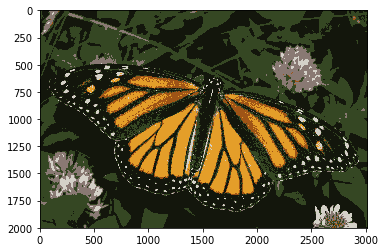

In [10]:
#IMPLEMENT K-MEANS CLUSTRING

#define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

#perform k-means clustering
k = 6
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

#convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

#Reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image_copy.shape))
labels_reshape = labels.reshape(image_copy.shape[0], image_copy.shape[1])

plt.imshow(segmented_image)

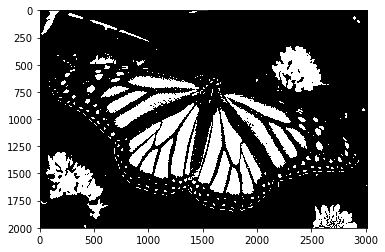

In [7]:
#Visualize one segment

plt.imshow(labels_reshape==1, cmap='gray')

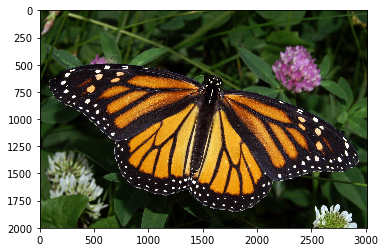

In [12]:
#mask image segment
masked_image = np.copy(image_copy)
masked_image[labels_reshape == 1] == [0,0,0]

plt.imshow(masked_image)